# Introducción

## Manejo del notebook

Los notebooks de Jupyter tienen dos modos: modo _texto_ y modo _código_. En el primero, se permite escribir cadenas de texto como esta que estás leyendo; en el segundo, lo que se escriba se interpreta como código que se ejecutará en Python.

Cuando seleccionamos una celda, su entorno cambia de color: se vuelve azul si estamos en modo _editar_ celda o verde si estamos en modo _escritura_ en la celda.

Si queremos pasar de un modo a otro, tendremos que pulsar Escape para entrar en el modo edición y Enter, para el modo escritura.

Mientras que estamos en el modo edición, las letras realizan distintos comandos:
 - A: Crea una celda arriba de la actual.
 - B: Crea una celda bajo la actual.
 - X: Corta una celda.
 - C: Copia una celda.
 - V: Pega una celda
 - Y: Indica que la celda contiene código para ser evaluado.
 - M: Indica que la celda contiene texto.

Cuando estemos en el modo escritura, para evaluar la celda tendremos que pulsar _Mayúscula+Enter_. Si la celda tenía un código lo ejecutará y si tiene un texto, lo mostrará por pantalla. Notemos que cuando escribimos texto, podemos utilizar Markdown, LaTeX y html para obtener los resultados que queramos.

## Operaciones básicas

In [2]:
#  Suma:
2+3

5

In [3]:
# Resta
2-3

-1

In [4]:
# Producto
2*3

6

In [5]:
# Cociente
2/3

0.6666666666666666

In [6]:
# Potencia
2**3

8

In [7]:
# División entera
2//3

0

In [8]:
# Resto
2%3

2

# Algoritmo RSA

In [6]:
# En primer lugar elegimos dos números primos
p = 11
q = 13

In [7]:
# Calculamos n y m
n = p*q
m = (p-1)*(q-1)

In [8]:
# Elegimos e que sea menor que m
e = 7

In [9]:
# Calculamos un d tal que e*d =1 (mod m)
for d in range(m):
    if e*d %m == 1:
        print("d = ",d)
        break

d =  103


In [17]:
print("La clave pública es (" + str(n) + ","+ str(e)+ ") y la clave privada es (" + str(n) + ","+ str(d)+ ")")

La clave pública es (143,7) y la clave privada es (143,103)


In [20]:
def Encriptar(mensaje,clave):
    return mensaje**clave[1]%clave[0]
def Desncriptar(mensaje,clave):
    return mensaje**clave[1]%clave[0]

In [21]:
# Ejemplo de encriptación
Encriptar(3,[n,e])

42

In [22]:
# Ejemplo de desencriptación
Encriptar(42,[n,d])

3

# Matrices 

Para trabajar con matrices tenemos que cargar en primer lugar la biblioteca _numpy_. Cuando las importamos, es una buena práctica ponerles un alias. Así, sabremos en todo momento la función que estamos usando y evitaremos problemas por tener distintas funciones con el mismo nombre.

In [2]:
import numpy as np

El tipo de datos _array_ me permite crear un vector, el cual escribimos entre corchetes. Un vector cuyos elementos es un vector forma una matriz.

In [3]:
# Suma de matrices
A = np.array([[1, 1],[0, 1]])
B = np.array([[4, 1],[2, 2]])
A+B

array([[5, 2],
       [2, 3]])

In [10]:
# Producto de matrices
A = np.array([[1, 1],[0, 1]])
B = np.array([[4, 1],[2, 2]])
np.matmul(A,B)

array([[6, 3],
       [2, 2]])

In [5]:
# Inversa de una matriz
A = np.array([[1, 1],[0, 1]])
np.linalg.inv(A)

array([[ 1., -1.],
       [ 0.,  1.]])

In [69]:
# Determinante de una matriz
A = np.array([[1, 1],[0, 1]])
np.linalg.det(A)

1.0

## Tratamiento de imágenes

In [25]:
import matplotlib.pyplot as plt

Una imagen no es más que una matriz de valores que nuestras pantallas representa como píxeles.

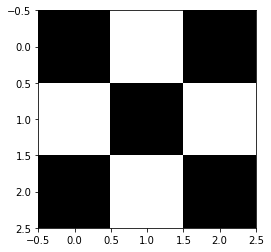

In [34]:
#Creamos una matriz
imagen1 = np.array([[1,0,1],[0,1,0],[1,0,1]])
#Mostamos la imagen.
plt.imshow(imagen1,cmap='Greys'); # La opción cmap='Greys' nos produce la imagen en blanco y negro

Hemos creado una imagen donde cada 1 ha sido representado por un cuadrado negro y cada 0, por uno blanco. Si queremos representar una imagen a color, en lugar de un solo número 1 o 0, tendremos que escribir un vector de tres componentes Rojo, Verde y Azul conocido como RGB (del azul, Red, Green and Blue).

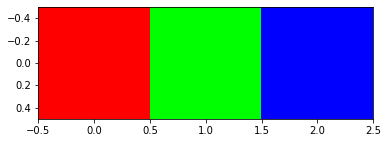

In [37]:
imagen2 = [[[255,0,0],[0,255,0],[0,0,255]]]
plt.imshow(imagen2)

Vemos como podemos crear un cuadrado de cada color básico. En el paquete _misc_ de _scipy_ podemos encontrar una imagen de mayor tamaño.

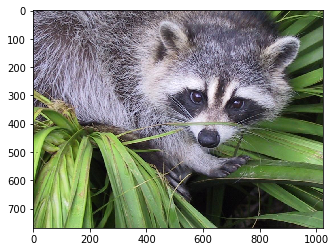

In [38]:
from scipy import misc
imagen3 = misc.face() # Cargamos la imagen
plt.imshow(imagen3);

Como la imagen es una matriz, podemos manipularla a nuestro antojo. Por ejemplo, si hacemos la media de cada elemento de la matriz, obtenedremos la misma imagen en escala de grises.

In [62]:
def EscalaGris(imagen):
    n = len(imagen)
    m = len(imagen[0])
    image_bn = []
    for x in range(n):
        linea = list([])
        for y in range(m):
            linea.append(np.array(imagen)[x][y].mean())
        image_bn.append(linea)
    return image_bn

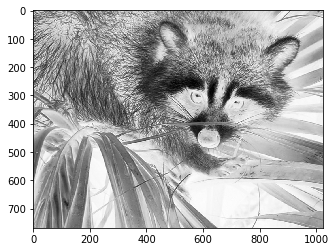

In [64]:
plt.imshow(EscalaGris(imagen3),cmap='Greys')

Ahora que está la imagen en blanco y negro, si solamente pintamos los píxeles que tienen un valor mayor que cierto umbral, podríamos encontrar los puntos más relevantes de la imagen o incluso limpiar el ruido de la misma. Podemos también dejar un color solamente y eliminar el resto.

In [67]:
def ImagenRojo(imagen):
    n = len(imagen)
    m = len(imagen[0])
    image_rj = []
    for x in range(n):
        linea = list([])
        for y in range(m):
            pixel = np.array(imagen)[x][y]
            linea.append(np.array([pixel[0],0,0]))
        image_rj.append(linea)
    return image_rj

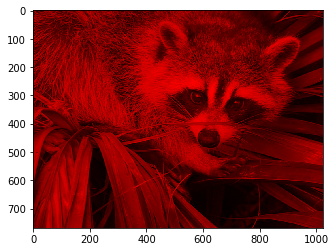

In [68]:
plt.imshow(ImagenRojo(imagen3))

# Sistemas de ecuaciones

Para poder resolver sistemas de ecuaciones, necesitamos una biblioteca de cálculo simbólico y definir las variables como simbolos.

In [71]:
import sympy as sp

In [72]:
x = sp.symbols('x')
y = sp.symbols('y')

La función _solve_ nos permite resolver sistemas de ecuaciones lineales, para ello, pondremos las ecuaciones entre corchetes (siempre se asumen igualadas a cero) y a continuación las variables.

In [75]:
# Sistema compatible determinado
sp.solve([x+y-2,x-y],[x,y])

{x: 1, y: 1}

In [76]:
# Sistema compatible indeterminado
sp.solve([x+y,2*x+2*y],[x,y])

{x: -y}

In [77]:
# Sistema incompatible
sp.solve([x+y,x+y-1],[x,y])

[]

# Diagonalización

Para calcular los autovectores y autovalores de una matriz, Python tiene ya una función predefinida.

In [82]:
A = np.array([[1,2,3],[2,4,5],[3,5,6]])
np.linalg.eig(A)

(array([11.34481428, -0.51572947,  0.17091519]),
 array([[-0.32798528, -0.73697623,  0.59100905],
        [-0.59100905, -0.32798528, -0.73697623],
        [-0.73697623,  0.59100905,  0.32798528]]))

Esta función nos devuelve dos lisats, la primera contiene los autovalores de la matriz, y la segunda, los autovectores.